# PROBLEM SATEMENT
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

# IMPORTING LIBRARIES

In [1]:
# importing the libraries
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.cluster import hierarchy as sch
from sklearn.metrics import silhouette_score as sil
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as agg
from sklearn.cluster import DBSCAN as dbs
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Importing xlsx File

In [2]:
# importing the EastWestAirlines.xlsx datafile
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

# EDA

In [3]:
# to see first 5 rows
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# to see the number of rows and columns
df.shape

(3999, 12)

In [5]:
# to get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
# to see stastical data
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
# to see is there anu null values
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
# to see the sum of duplicated rows
df.duplicated().sum()

0

In [9]:
# Column Renaming
df=df.rename(columns={'ID#':'ID','Award?':'Award'})

In [10]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
# Feature Engineering
# dropping nonuseful columns
df1=df.drop(["ID","Award"],axis=1)

In [12]:
df1


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


#### Normalizing the Data

In [13]:
# # normalize fuction changes the data into one single scale but in list form so we changing it into the dataframe again
from sklearn.preprocessing import normalize
df_norm=pd.DataFrame(normalize(df1),columns=df1.columns)
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718


In [14]:
df_norm.shape

(3999, 10)

# Visualization

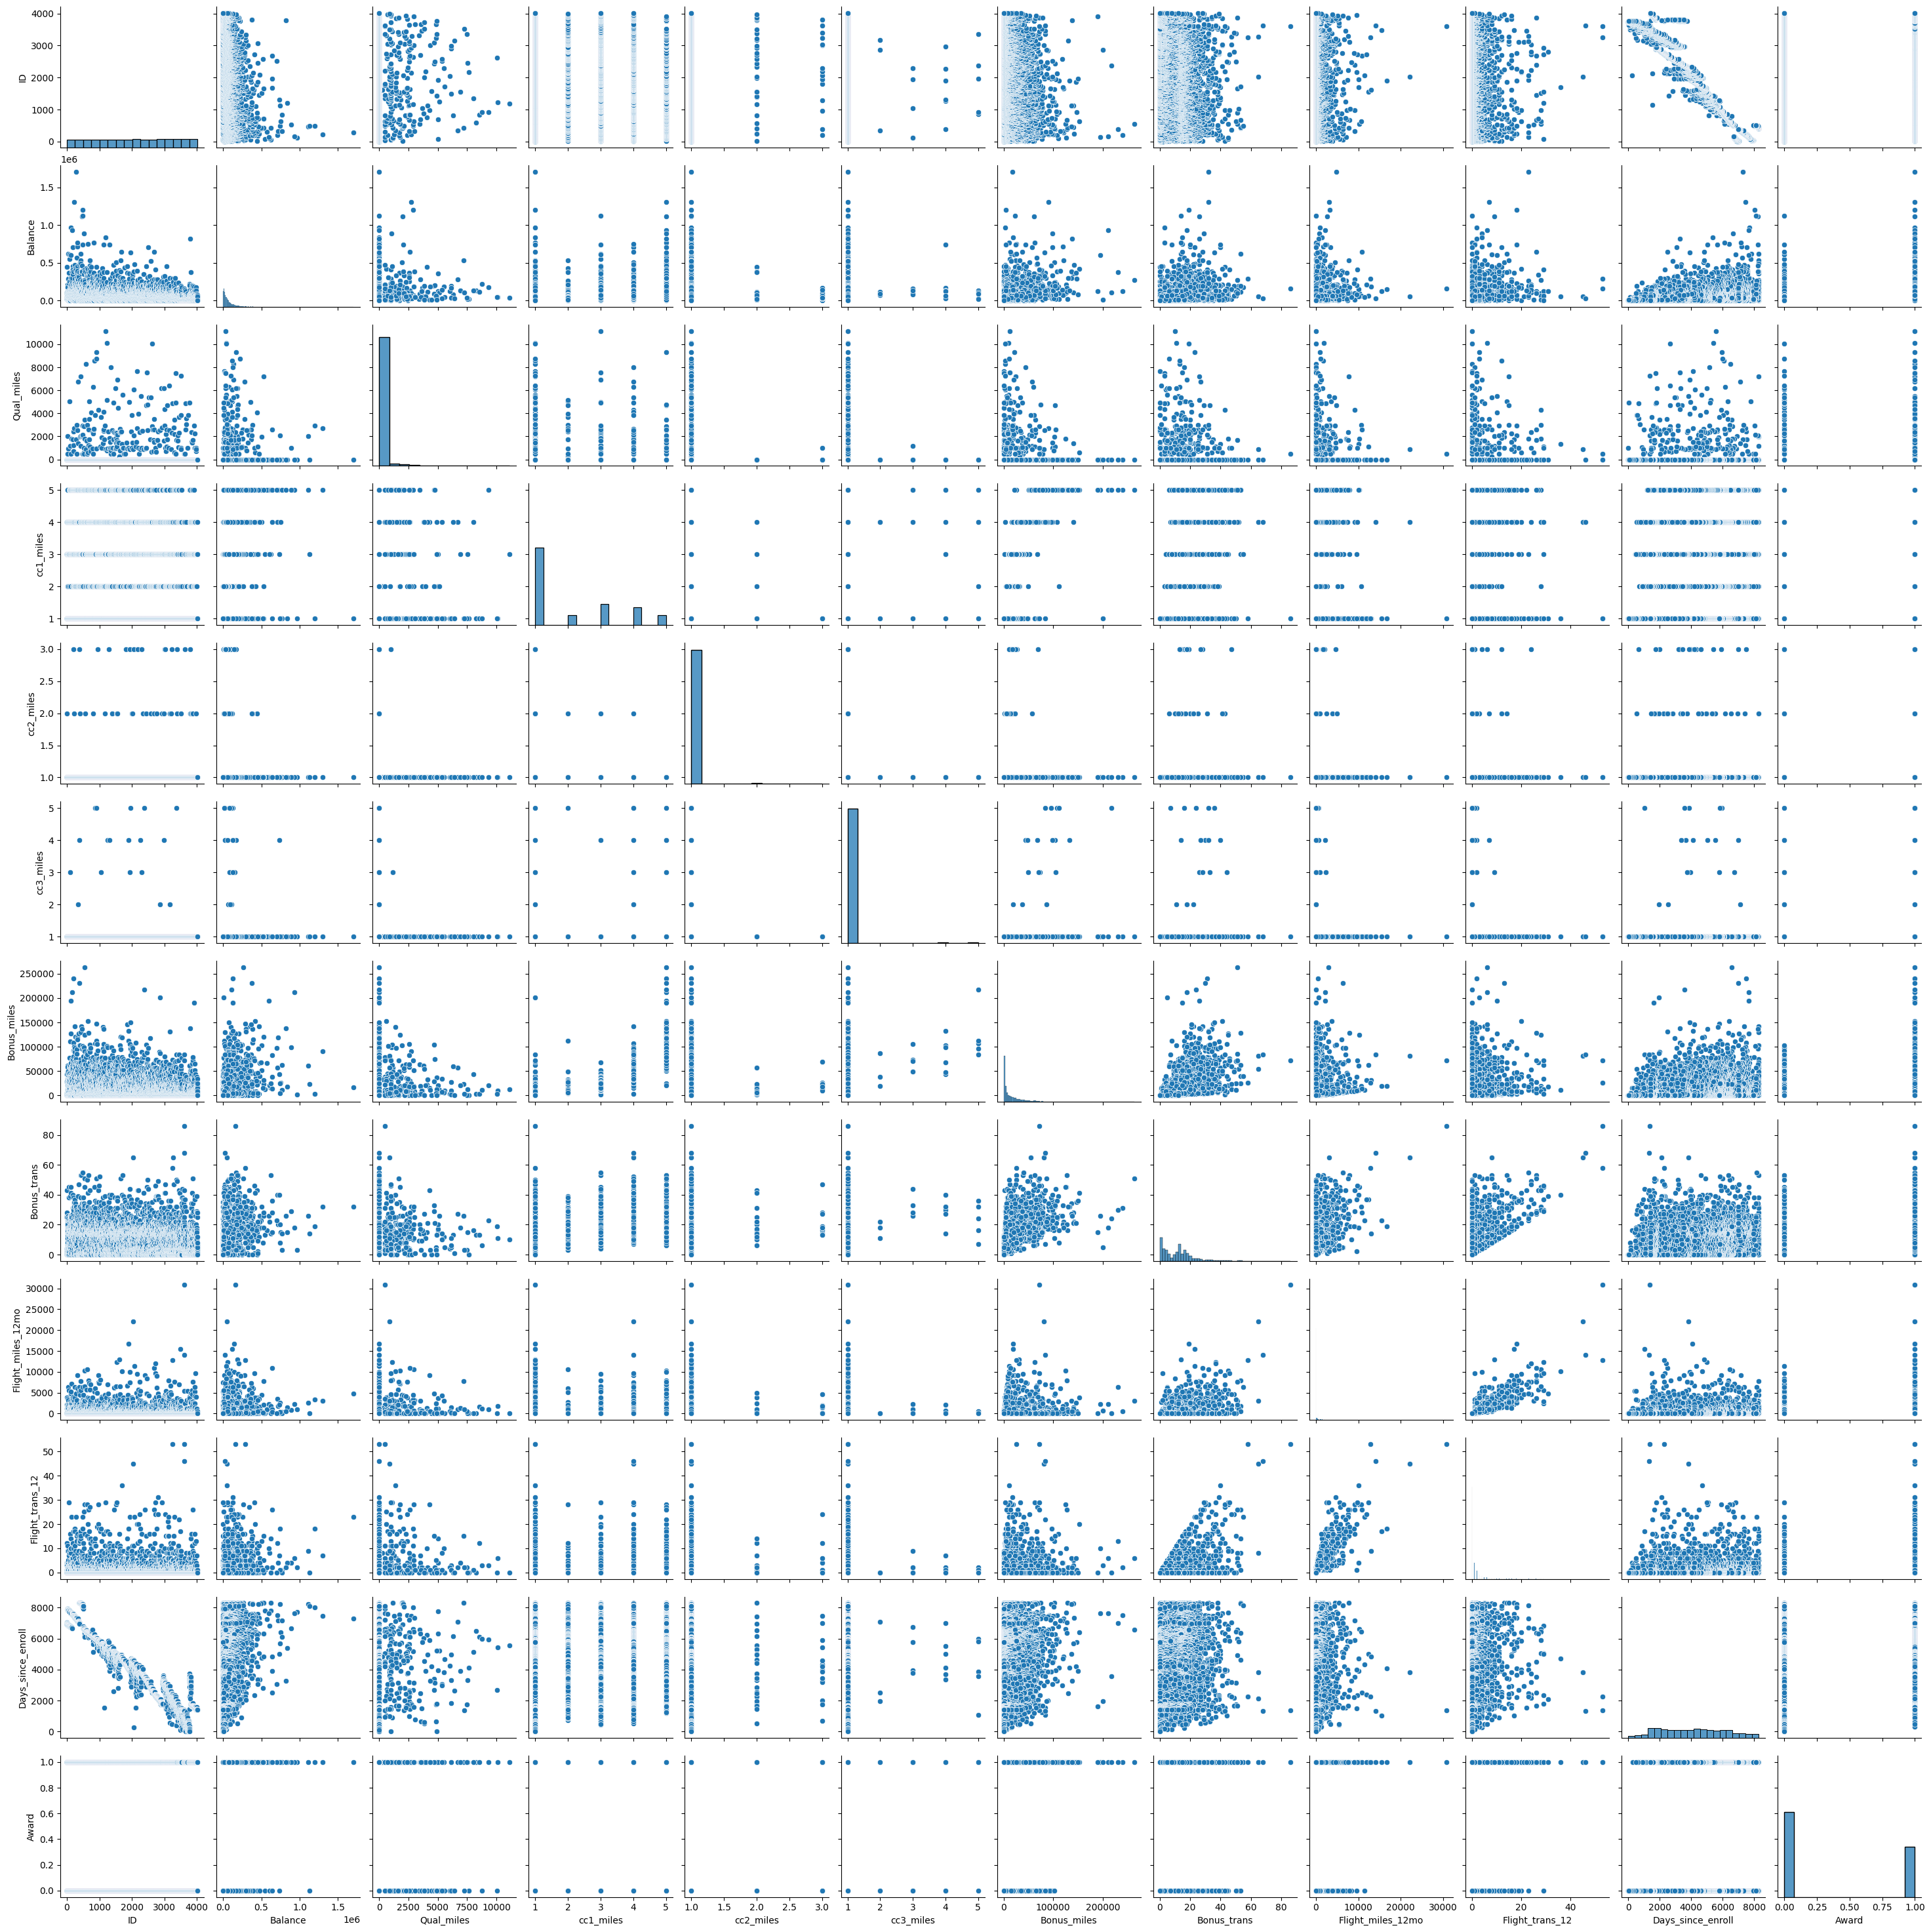

In [15]:
# to see the relation of the columns in df (normal) data
sns.pairplot(df)
plt.show()

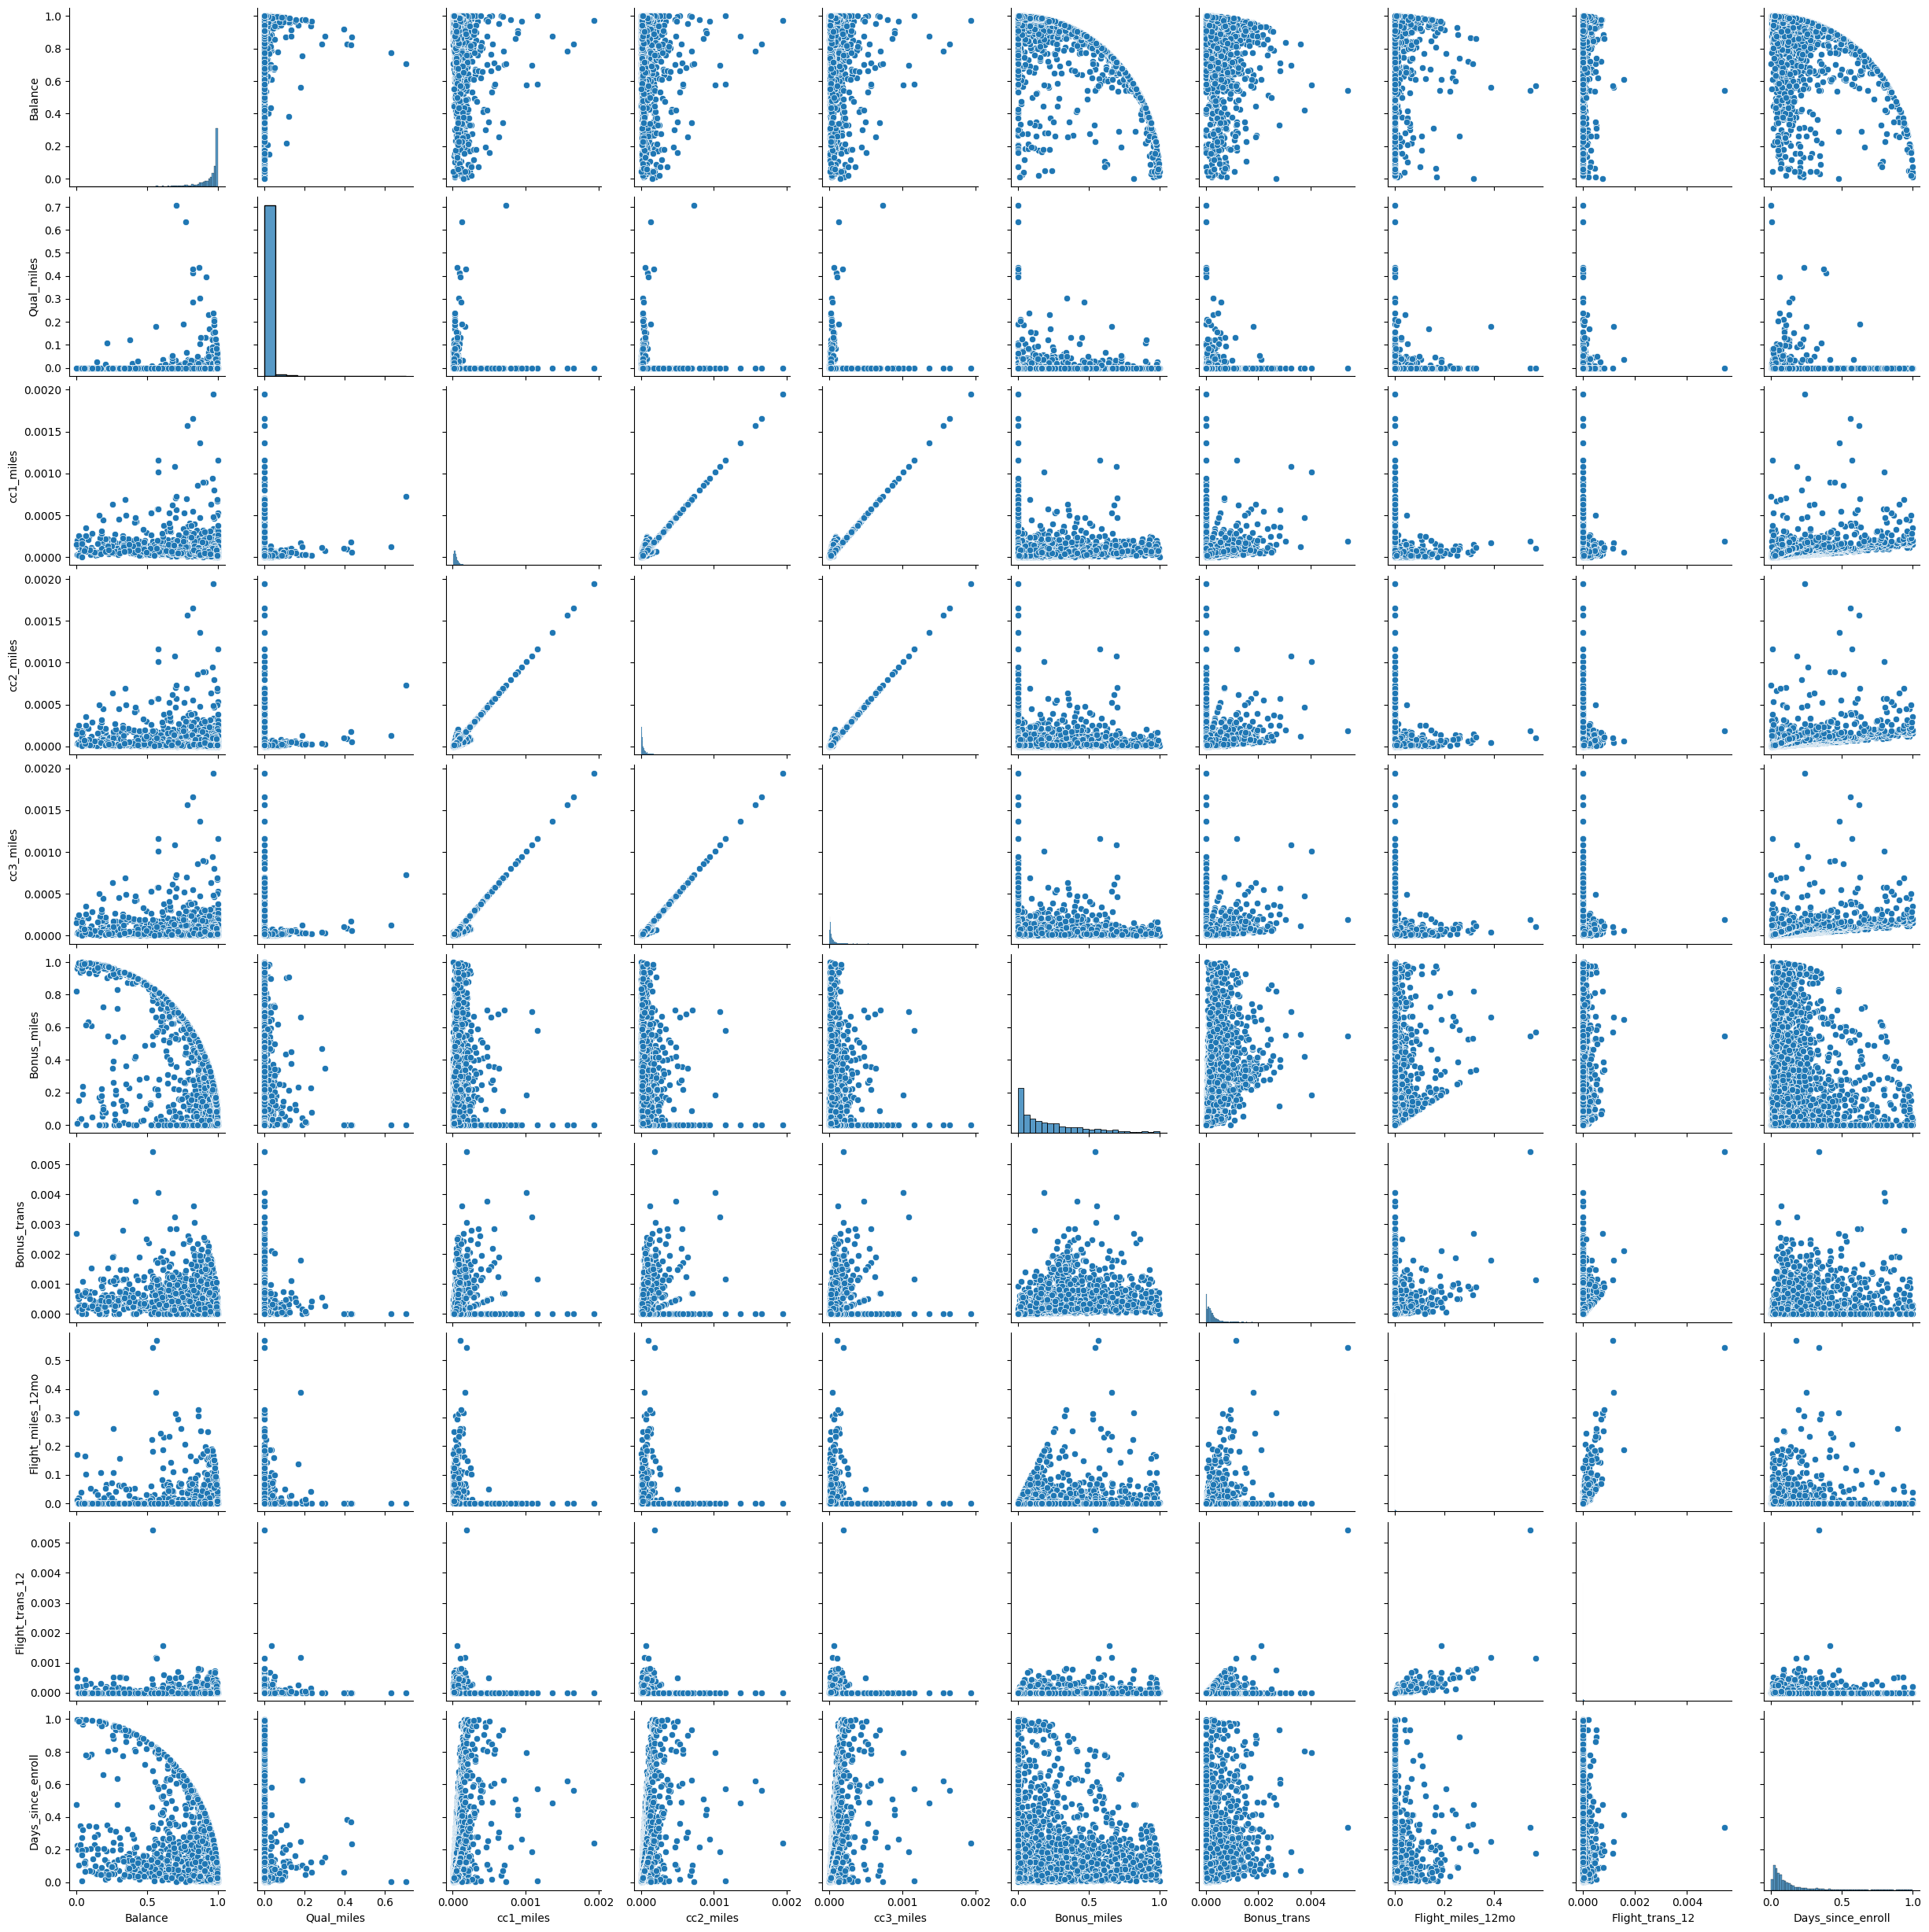

In [16]:
# to see the relations between the columns of df_norm data
sns.pairplot(df_norm)
plt.show()

# Now different clustering methods to do clustering

## 1.Hierarchical Clustering

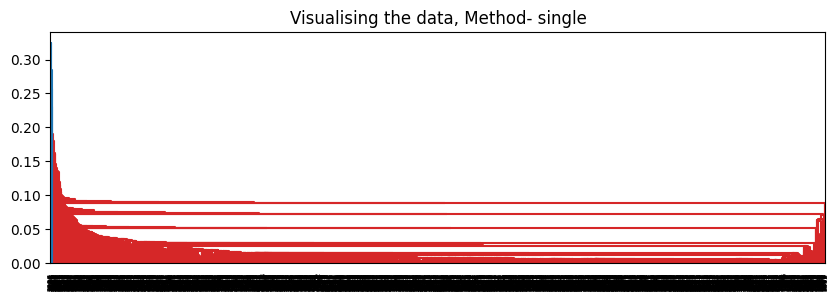

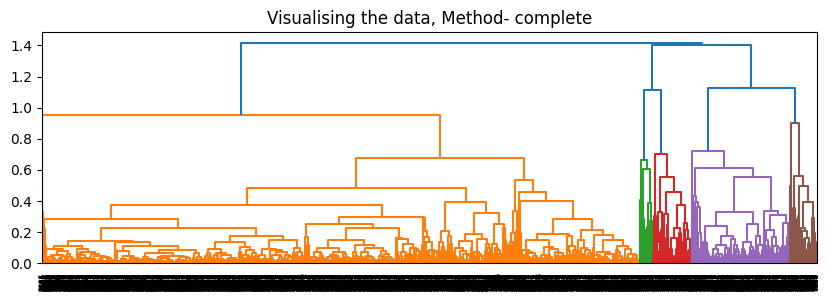

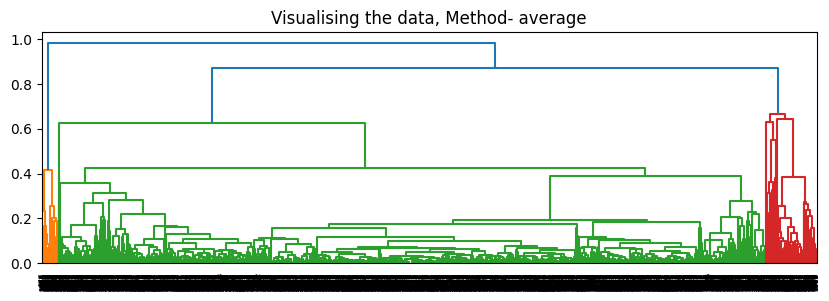

In [17]:
# there are 3 methods for the dendogram so we would use loop to apply each method
for methods in ['single','complete','average']:
    plt.figure(figsize =(10, 3))
    plt.title('Visualising the data, Method- {}'.format(methods))
    Dendrogram = sch.dendrogram(sch.linkage(df_norm, method = methods,optimal_ordering=False))

plt.show()

# Inference
As we can see that in single linkage method clusters are not properly formed but in average and complete method they look finely differentiable and by that we can see that we can easily make 3 clusters by average and 5 clusters by complete.

In [18]:
# for more conformation here we are gonna use Silhouette Coefficient score
nc=[2,3,4,5,6,7,8,9]
# different number of clusters
for i in nc:
    for linkages in ['single','average','complete']: # different types of linkages
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean',linkage = linkages)
        y = hc.fit_predict(df_norm)
        sc=sil(df_norm,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 2, linkage = single, Sc score = 0.6414807597188987


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 2, linkage = average, Sc score = 0.6199075368947913


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 2, linkage = complete, Sc score = 0.5414238117493092



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 3, linkage = single, Sc score = 0.4980808146158188


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 3, linkage = average, Sc score = 0.6023264073883706


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 3, linkage = complete, Sc score = 0.5757037645688332



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 4, linkage = single, Sc score = 0.45957880996099165


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 4, linkage = average, Sc score = 0.5734105133284102


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 4, linkage = complete, Sc score = 0.5322356437626531



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 5, linkage = single, Sc score = 0.42528433822274675


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 5, linkage = average, Sc score = 0.5687644465781913


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 5, linkage = complete, Sc score = 0.5081755801489433



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 6, linkage = single, Sc score = 0.40955584890813773


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 6, linkage = average, Sc score = 0.5654812187325654


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 6, linkage = complete, Sc score = 0.5072814131618931



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 7, linkage = single, Sc score = 0.3199296913983993


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 7, linkage = average, Sc score = 0.4869350433804178


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 7, linkage = complete, Sc score = 0.5056954623037809



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 8, linkage = single, Sc score = 0.2692393234680577


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 8, linkage = average, Sc score = 0.4666074642227136


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 8, linkage = complete, Sc score = 0.5048232543743064



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 9, linkage = single, Sc score = 0.1753712119150663


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 9, linkage = average, Sc score = 0.48056859371738203


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters = 9, linkage = complete, Sc score = 0.4962945051290907



# inference
As we can see for proper clustering we are comparing between 3 or 5 (as per dendogram) and by comparison we can say 3 is better than 5 with higher Silhouette Coefficient score of 0.6023264073883706 for average and 0.5757037645688332 for complete linkage .

so we gonna use affinity = euclidean,no. of clusters = 3 and linkage = average ( also can use complete but its SC Score is lower).

In [19]:
# defining the model and prediction
first_model = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
y=first_model.fit_predict(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [20]:
df['cluster id']=y

In [21]:
np.unique(df["cluster id"])

array([0, 1, 2])

In [22]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [23]:
# to see which data belongs to which cluster
df.groupby(["cluster id"])["ID"].apply(lambda x:tuple(x))

cluster id
0    (16, 42, 82, 83, 88, 94, 103, 108, 112, 166, 1...
1    (40, 52, 144, 182, 213, 220, 282, 401, 412, 41...
2    (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name: ID, dtype: object

In [24]:
# predicted values- values divided by labels of cluster
first_model.labels_

array([2, 2, 2, ..., 2, 2, 2])

# 2. K-Means

In [25]:
#Finding optimal number of cluster for normalize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(df_norm)
    iner.append(Km.inertia_)


for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(df_norm)
    silscore.append(sil(df_norm,y))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [26]:
# inertia values
iner

[267.5974093239801,
 173.27025436241559,
 116.3248141226452,
 90.82430882178178,
 70.47341402506979,
 60.07757726586439,
 51.935028840720946,
 47.170503224989474]

In [27]:
# silhoutte scores
silscore

[0.5555975297126332,
 0.5722202901269124,
 0.49477079567705473,
 0.5015436677019806,
 0.4780941755355571,
 0.4337236472571184,
 0.4374303553309767,
 0.44230340547818986]

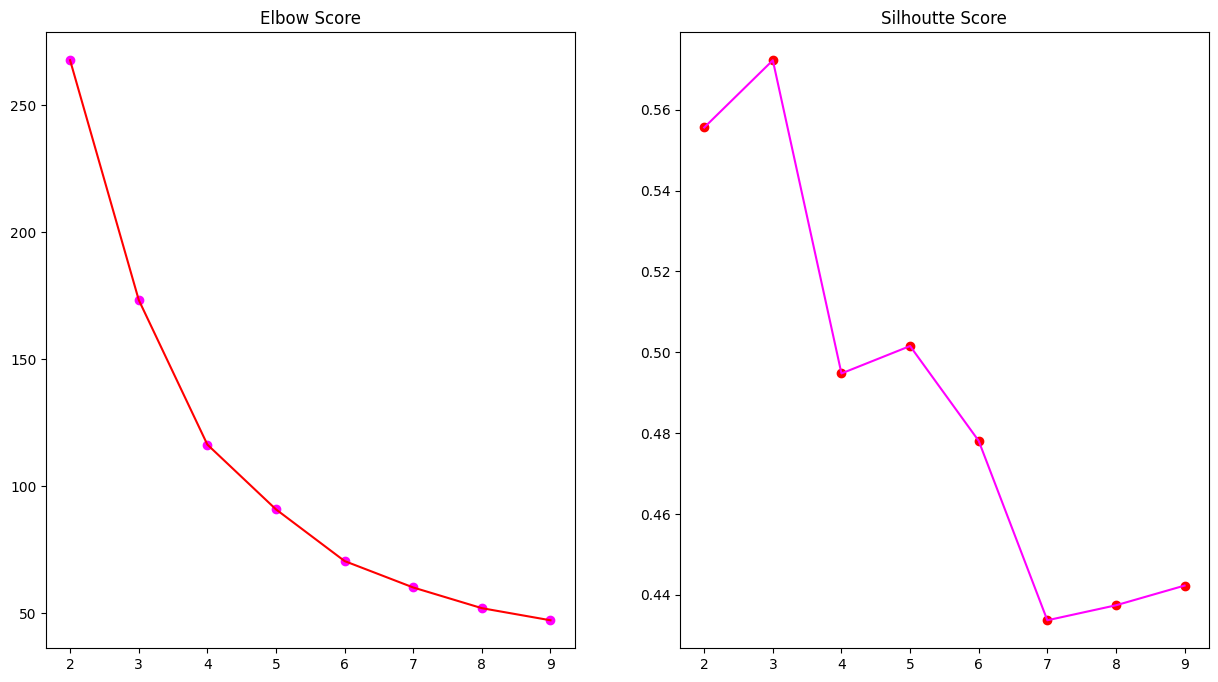

In [28]:
# plotting Elbow Score and Silhoutte Score graphs
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color='red')
plt.scatter(nc,iner,color='magenta')
plt.title('Elbow Score')

plt.subplot(1,2,2)
plt.plot(nc,silscore,color='magenta')
plt.scatter(nc,silscore,color='red')
plt.title('Silhoutte Score')
plt.show()

# Inference
Optimal number of clustering
1. as per elbow graph the significant change is after 3 and
2. as per Silhoutte Score at 3 its heighest so is 3.

so by K-Means Optimal number of clustering is 3.

## 3.DBSCAN

In [29]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718


In [30]:
# importing DBscan
from sklearn.cluster import DBSCAN

In [31]:
# defining the model
dbs=DBSCAN(eps=.1, min_samples=2)

In [32]:
# fitting the model
labels=dbs.fit_predict(df_norm)

In [33]:
np.unique(labels)


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [34]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
df["cluster id"]=labels

In [36]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [37]:
# to see which data belongs to which cluster
df.groupby(["cluster id"])["ID"].apply(lambda x:tuple(x))

cluster id
-1     (94, 380, 448, 502, 969, 977, 1089, 1143, 1189...
 0     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
 1                                      (245, 496, 2433)
 2                                           (513, 2345)
 3                                     (517, 1158, 2505)
 4                                     (575, 1304, 2071)
 5                                           (987, 3867)
 6                                          (1275, 2007)
 7                                          (1307, 4007)
 8                                          (1576, 2815)
 9                                          (2863, 3835)
 10                                         (3720, 3770)
Name: ID, dtype: object

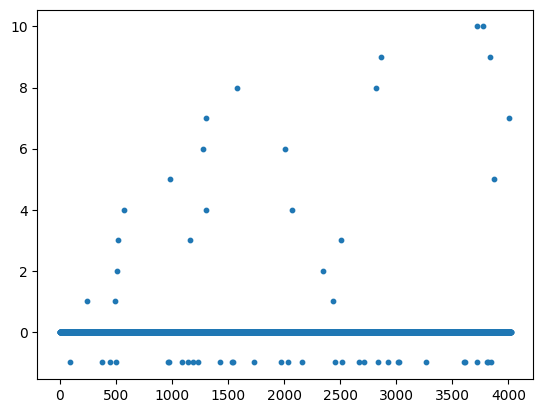

In [38]:
plt.scatter(df["ID"],df["cluster id"],s=10)
plt.show()